In [25]:
import os
import re
import json
import gzip
import pandas as pd
import matplotlib.pyplot as plt
from string import punctuation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords

In [6]:
INDIR = 'data/'
video_dir = os.path.join(INDIR, 'reviews_Video_Games_5.json.gz')

### Read data

In [7]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield eval(l)

In [8]:
data = []
for l in parse(video_dir):
    data.append(l)

In [9]:
data[0]

{'reviewerID': 'A2HD75EMZR8QLN',
 'asin': '0700099867',
 'reviewerName': '123',
 'helpful': [8, 12],
 'reviewText': 'Installing the game was a struggle (because of games for windows live bugs).Some championship races and cars can only be "unlocked" by buying them as an addon to the game. I paid nearly 30 dollars when the game was new. I don\'t like the idea that I have to keep paying to keep playing.I noticed no improvement in the physics or graphics compared to Dirt 2.I tossed it in the garbage and vowed never to buy another codemasters game. I\'m really tired of arcade style rally/racing games anyway.I\'ll continue to get my fix from Richard Burns Rally, and you should to. :)http://www.amazon.com/Richard-Burns-Rally-PC/dp/B000C97156/ref=sr_1_1?ie=UTF8&qid;=1341886844&sr;=8-1&keywords;=richard+burns+rallyThank you for reading my review! If you enjoyed it, be sure to rate it as helpful.',
 'overall': 1.0,
 'summary': "Pay to unlock content? I don't think so.",
 'unixReviewTime': 134179

### Check missing value and duplication

In [12]:
df = pd.DataFrame(data)

In [13]:
df.head()

reviewerID        asin                        reviewerName  helpful  \
0  A2HD75EMZR8QLN  0700099867                                 123  [8, 12]   
1  A3UR8NLLY1ZHCX  0700099867  Alejandro Henao "Electronic Junky"   [0, 0]   
2  A1INA0F5CWW3J4  0700099867          Amazon Shopper "Mr.Repsol"   [0, 0]   
3  A1DLMTOTHQ4AST  0700099867                            ampgreen  [7, 10]   
4  A361M14PU2GUEG  0700099867        Angry Ryan "Ryan A. Forrest"   [2, 2]   

                                          reviewText  overall  \
0  Installing the game was a struggle (because of...      1.0   
1  If you like rally cars get this game you will ...      4.0   
2  1st shipment received a book instead of the ga...      1.0   
3  I got this version instead of the PS3 version,...      3.0   
4  I had Dirt 2 on Xbox 360 and it was an okay ga...      4.0   

                                           summary  unixReviewTime  \
0         Pay to unlock content? I don't think so.      1341792000   
1                                  Good rally game      1372550400   
2                                        Wrong key      1403913600   
3  awesome game, if it did not crash frequently !!      1315958400   
4                                           DIRT 3      1308009600   

    reviewTime  
0   07 9, 2012  
1  06 30, 2013  
2  06 28, 2014  
3  09 14, 2011  
4  06 14, 2011

only reviewName has missing values

In [14]:
for k, v in df.items():
    print(k, df[k].isnull().values.any(), df[k].isnull().sum())

reviewerID False 0
asin False 0
reviewerName True 2813
helpful False 0
reviewText False 0
overall False 0
summary False 0
unixReviewTime False 0
reviewTime False 0


no duplication

In [15]:
df[df.applymap(lambda x: x[0] if isinstance(x, list) else x).duplicated()]  # no duplication

Empty DataFrame
Columns: [reviewerID, asin, reviewerName, helpful, reviewText, overall, summary, unixReviewTime, reviewTime]
Index: []

all text is ascii

In [16]:
def is_ascii(s):
    return all(ord(c) < 128 for c in s)

for t in df['reviewText']:
    if not is_ascii(t):
        print('yes')

In [17]:
for t in df['reviewText']:
    if re.search(r"\s{2,}", t):
        print('There is multiple space')
        break

There is multiple space


In [18]:
# from emoji import UNICODE_EMOJI

# def is_emoji(s):
#     count = 0
#     for emoji in UNICODE_EMOJI:
#         count += s.count(emoji)
#         if count > 1:
#             return True
#     return False

In [19]:
# for review in df['reviewText']:
#     if any(item in UNICODE_EMOJI for item in review):
#         print('There is emoji in review')
#         break

There is no emoji in reviews

### Data discovery

In [20]:
data[0]

{'reviewerID': 'A2HD75EMZR8QLN',
 'asin': '0700099867',
 'reviewerName': '123',
 'helpful': [8, 12],
 'reviewText': 'Installing the game was a struggle (because of games for windows live bugs).Some championship races and cars can only be "unlocked" by buying them as an addon to the game. I paid nearly 30 dollars when the game was new. I don\'t like the idea that I have to keep paying to keep playing.I noticed no improvement in the physics or graphics compared to Dirt 2.I tossed it in the garbage and vowed never to buy another codemasters game. I\'m really tired of arcade style rally/racing games anyway.I\'ll continue to get my fix from Richard Burns Rally, and you should to. :)http://www.amazon.com/Richard-Burns-Rally-PC/dp/B000C97156/ref=sr_1_1?ie=UTF8&qid;=1341886844&sr;=8-1&keywords;=richard+burns+rallyThank you for reading my review! If you enjoyed it, be sure to rate it as helpful.',
 'overall': 1.0,
 'summary': "Pay to unlock content? I don't think so.",
 'unixReviewTime': 134179

In [21]:
data[0].keys()

dict_keys(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime'])

In [82]:
data[0].values()

dict_values(['A2HD75EMZR8QLN', '0700099867', '123', [8, 12], 'Installing the game was a struggle (because of games for windows live bugs).Some championship races and cars can only be "unlocked" by buying them as an addon to the game. I paid nearly 30 dollars when the game was new. I don\'t like the idea that I have to keep paying to keep playing.I noticed no improvement in the physics or graphics compared to Dirt 2.I tossed it in the garbage and vowed never to buy another codemasters game. I\'m really tired of arcade style rally/racing games anyway.I\'ll continue to get my fix from Richard Burns Rally, and you should to. :)http://www.amazon.com/Richard-Burns-Rally-PC/dp/B000C97156/ref=sr_1_1?ie=UTF8&qid;=1341886844&sr;=8-1&keywords;=richard+burns+rallyThank you for reading my review! If you enjoyed it, be sure to rate it as helpful.', 1.0, "Pay to unlock content? I don't think so.", 1341792000, '07 9, 2012'])

In [83]:
for k, v in data[0].items():
    print(k, type(v))

reviewerID <class 'str'>
asin <class 'str'>
reviewerName <class 'str'>
helpful <class 'list'>
reviewText <class 'str'>
overall <class 'float'>
summary <class 'str'>
unixReviewTime <class 'int'>
reviewTime <class 'str'>


In [101]:
df['reviewerID'].nunique()  # 24303 users

24303

In [102]:
df['asin'].nunique()  # 10672 items

10672

### Data processing

1. **remove stopwords**: link, url
2. **character repetition**: hottttt -> hot
3. **emoticon**
4. **spelling correction**: based on Levenshtein Distance with a given corpus---**TODO**

In [22]:
reviews = [x['reviewText'] for x in data]
ratings = [x['overall'] for x in data]

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/chrys/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
stopwords = stopwords.words('english')
to_delete = ['more', 'most', 'no', 'nor',
             'not', 'very', 'don', "don't",
             'ain', 'aren', "aren't", 'couldn',
             "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn',
             "hadn't", 'hasn', "hasn't",
             'haven', "haven't", 'isn',
             "isn't", 'mightn', "mightn't",
             'mustn', "mustn't", 'needn',
             "needn't", 'shan', "shan't",
             'shouldn', "shouldn't", 'wasn',
             "wasn't", 'won', "won't",
             'wouldn', "wouldn't"]
stopwords = [s for s in stopwords if s not in to_delete]

In [27]:
def clean_text(text: str):
    """
    Preprocessing steps:
        1) Change emoticons to texts
        2) Remove repeating characters (repeat >3 times)
        3) Demoji
        4) Delete repeating emoji/words
        5) Remove non-ascii characters
        6) Remove duplicate white spaces
    """
    # change emoticon to text
    text = re.sub(r':\(', ' dislike ', text)
    text = re.sub(r': \(\(', ' dislike ', text)
    text = re.sub(r':, \(', 'dislike', text)
    text = re.sub(r':\)', ' smile ', text)
    text = re.sub(r';\)', ' smile ', text)
    text = re.sub(r':\)\)\)', ' smile ', text)
    text = re.sub(r':\)\)\)\)\)\)', ' smile ', text)
    text = re.sub(r'=\)\)\)\)', ' smile ', text)
    
    # remove any url
    text = re.sub(r'http\S+', '', text)

#     text = re.sub("(.)\\1{2,}", "\\1", text)  # remove repeating characters
#     text = emoji.demojize(text).replace(":", " ")  # demoji
    
    # Delete repeated emoji/words
    tokenizer = text.split()
    repeated_list = []
    last_word = ''
    for word in tokenizer:
        # remove duplicates in a sentence
        # eg. Awesome awesome = Awesome
        if word not in repeated_list and word.lower() != last_word:
            repeated_list.append(word)
            last_word = word.lower()
        # remove duplicate emoji in a sentence
        elif '_' not in word and word.lower() != last_word:
            repeated_list.append(word)
            last_word = word.lower()
    
    text = ' '.join(text for text in repeated_list)
    
    # remove punctuation
#     punctuation = '!#$%&\()*'+,-./:;<=>?@[\\]^_`{|}~'
    text = "".join([(ch if ch not in punctuation else " ") for ch in text])
    
    # remove stopwords
    text = text.split()
    text = [t.lower() for t in text if t.lower() not in stopwords]
    text = ' '.join(text)
    
    # remove duplicate white space
    text = ' '.join(text.split())
    
    return text

In [28]:
reviews_clean = [clean_text(x) for x in reviews]

In [29]:
df['reviews_clean'] = reviews_clean

In [30]:
# convert dataframe to list of dictionaries
data_clean = df.to_dict('records')

In [31]:
game_clean_dir = os.path.join(INDIR, 'reviews_Video_Games_5_processed.json')
with open(game_clean_dir, 'w') as f:
    json.dump(data_clean, f, indent=4)

### Data exploration

In [57]:
df.groupby('overall').count()

reviewerID    asin  reviewerName  helpful  reviewText  summary  \
overall                                                                   
1.0           14853   14853         14592    14853       14853    14853   
2.0           13663   13663         13556    13663       13663    13663   
3.0           28275   28275         28041    28275       28275    28275   
4.0           54804   54804         54351    54804       54804    54804   
5.0          120185  120185        118427   120185      120185   120185   

         unixReviewTime  reviewTime  reviews_clean  
overall                                             
1.0               14853       14853          14853  
2.0               13663       13663          13663  
3.0               28275       28275          28275  
4.0               54804       54804          54804  
5.0              120185      120185         120185

rating:  1.0


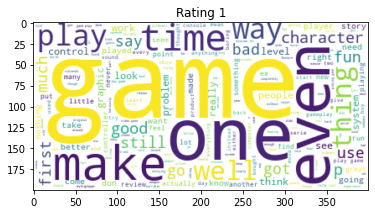

rating:  2.0


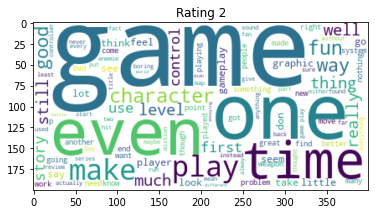

rating:  3.0


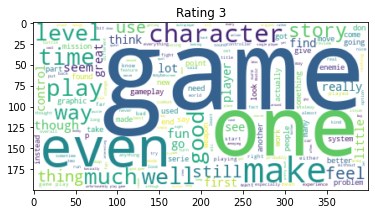

rating:  4.0


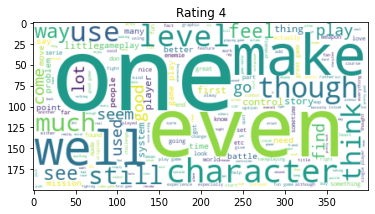

rating:  5.0


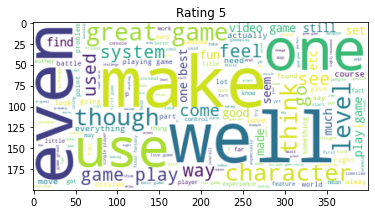

In [114]:
# stopwords = set(STOPWORDS)
# # remove some stopwords which have sentiment sense
# to_delete = ['above', "aren't", 'all', 'below',
#              'between', "can't", 'cannot',
#              'could', "couldn't", "didn't",
#              "doesn't", "don't",
#              'few', "hadn't", "hasn't",
#              "haven't", "isn't",
#              'like', 'more', 'most', "mustn't", 'no',
#              'nor', 'not', 'only', 'should',
#              "shouldn't", 'some', 'under',
#              'very', "wasn't",
#              "weren't", "won't", "wouldn't"]
# stopwords.difference_update(to_delete)

for r in sorted(df['overall'].unique()):
    combined_text = ' '.join(df[df['overall'] == r]['reviews_clean'])
    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white").generate(combined_text)
    # Display the generated image:
    print('rating: ', r)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Rating {}'.format(int(r)))
    plt.show()